In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv("../data/processed/processed_affairs.csv")

In [47]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

cols_to_use = [col for col in numeric_cols if col not in ['ID', 'affairs']]

corrs = df[cols_to_use].corrwith(df['affairs'])

corr_df = pd.DataFrame({
    'abs_correlation': corrs.abs(),
    'effect': corrs.apply(lambda x: 'positive' if x > 0 else 'negative')
})

corr_df = corr_df.sort_values(by='abs_correlation', ascending=False)

print(corr_df)


               abs_correlation    effect
happiness             0.279512  negative
yearsmarried          0.186842  positive
religiousness         0.144501  negative
age                   0.095237  positive
occupation            0.049612  positive
education             0.002437  negative


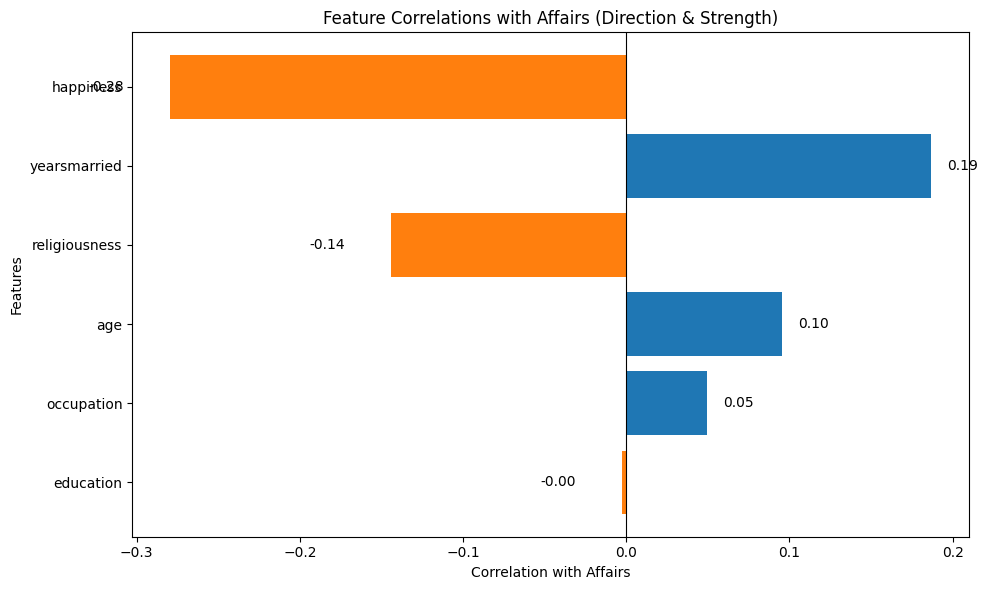

In [ ]:
corr_df_sorted = corr_df.sort_values(by='abs_correlation', ascending=True)  

colors = ['#1f77b4' if x > 0 else '#ff7f0e' for x in corr_df_sorted['correlation']]

plt.figure(figsize=(10,6))
bars = plt.barh(corr_df_sorted['feature'], corr_df_sorted['correlation'], color=colors)

for bar, val in zip(bars, corr_df_sorted['correlation']):
    plt.text(val + (0.01 if val > 0 else -0.05), bar.get_y() + bar.get_height()/2, f"{val:.2f}", va='center')

plt.axvline(0, color='black', linewidth=0.8)  
plt.xlabel('Correlation with Affairs')
plt.ylabel('Features')
plt.title('Feature Correlations with Affairs (Direction & Strength)')
plt.tight_layout()
plt.savefig("../plots/correlation_plot_image.png", dpi=300)
plt.show()
